# 음성 데이터
- https://m.blog.naver.com/sam2934/221574446765

#### 소리
> 주파수(소리의 높낮이)
- 단위 시간내 몇 개의 주기나 파형이 반복되었는가
- 소리의 높낮이: 음파의 진동수
- 매질인 공기가 얼마나 자주 흔들렸는지
- 높은 소리: 진동수가 큼(같은 시간 내 주기가 많음)
- 낮은 소리: 진동수가 작음(같은 시간 내 주기가 적으마)
- 주파수(frequency): 단위 시간당 빈도를 나타내는 말
- 48000Hz : 1초에 48주기

> 진폭(소리의 세기, 음파)
- 주기적인 진동이 있을 대 진동의 중심으로부터 최대로 움직인 거리(변위)
- 매질인 공기가 얼마나 크게 흔들렸는지
- 에너지를 많이 서어 이야기하면 진폭이 커져서 큰 목소리가 나옴
- 에너지를 작게 써서 이야기하면 진폭이 작아져서 작은 목소리가 나옴

> 파동(소리의 맵시)
- 파동이 생긴 모양
- 소리를 내는 물체에 따라 소리 파형의 모양이 다름

### 소리를 비교해보자

In [5]:
human_voice = './data/test-bimung.mp3'
machine_voice = './data/test_print.mp3'

In [6]:
from pydub import AudioSegment
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

AudioSegment.converter = "C:/Program Files/ffmpeg-20200513-b12b053-win64-static/bin/ffmpeg.exe"
AudioSegment.ffmpeg = "C:/Program Files/ffmpeg-20200513-b12b053-win64-static/bin/ffmpeg.exe"
AudioSegment.ffprobe ="C:/Program Files/ffmpeg-20200513-b12b053-win64-static/bin/ffprobe.exe"

In [9]:
human_sound = AudioSegment.from_file(human_voice)
machine_sound = AudioSegment.from_file(machine_voice)

In [12]:
human_sound2 = human_sound.get_array_of_samples().tolist()
machine_sound2 = machine_sound.get_array_of_samples().tolist()

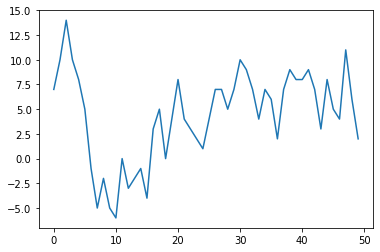

In [19]:
plt.plot(human_sound2[100:150])

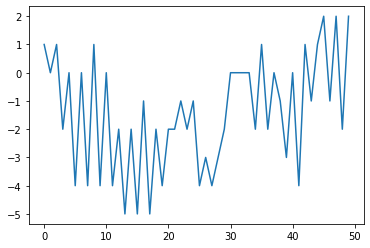

In [20]:
plt.plot(machine_sound2[20000:20050])

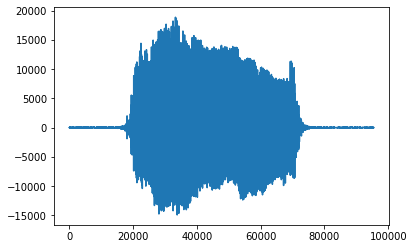

In [31]:
plt.plot(human_sound2)

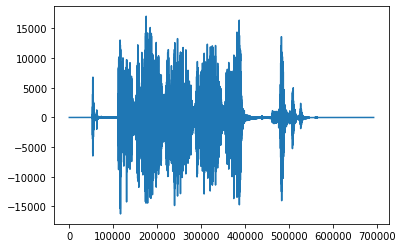

In [22]:
plt.plot(machine_sound2)

> 기계음과 사람의 목소리를 구별할 수 있을까?
- 여러가지 성능을 비교해봐야겠다

# pydub
- https://github.com/jiaaro/pydub

> ffmpeg install
- https://ffmpeg.zeranoe.com/builds/
    

In [14]:
!pip install pydub

In [8]:
from pydub import AudioSegment
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

AudioSegment.converter = "C:/Program Files/ffmpeg-20200513-b12b053-win64-static/bin/ffmpeg.exe"
AudioSegment.ffmpeg = "C:/Program Files/ffmpeg-20200513-b12b053-win64-static/bin/ffmpeg.exe"
AudioSegment.ffprobe ="C:/Program Files/ffmpeg-20200513-b12b053-win64-static/bin/ffprobe.exe"

In [9]:
filename = './data/test-bimung.mp3'
sound = AudioSegment.from_file(filename)

In [10]:
sound

### 파일 포멧 변환

In [11]:
sound.export("temp.wav", format="wav")

<_io.BufferedRandom name='temp.wav'>

### 오디오 파형 그리기

In [12]:
samples = sound.get_array_of_samples()

In [13]:
samples = samples.tolist()
len(samples)

95437

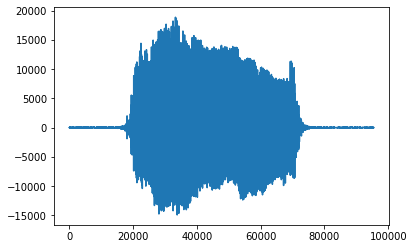

In [14]:
plt.plot(samples)

In [15]:
sound

### time 조작

In [16]:
sample_rate = sound.frame_rate
print(sample_rate)

48000


In [17]:
frame_count = sound.frame_count()
frame_count

95437.0

In [18]:
second = sound.duration_seconds
second

1.9882708333333334

In [24]:
second * sample_rate

95437.0

#### 1초를 60프레임으로 나누었다면

In [122]:
time_dict = {}

for i in range(int(frame_count)):
    if i % 48000 == 0:
        time2 = [i]
    else:
        time2.append(i)
    time_dict[i//48000]= time2

### 음원 자르기
- 0~1초일 때 sound 가져오기
- pydub는 millysecond 단위

In [128]:
second = 1
millysecond = second * 1000

sound1 = sound[:millysecond]



In [129]:
sound1

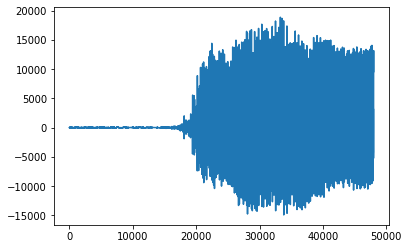

In [131]:
plt.plot(sound1.get_array_of_samples().tolist())